In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

In [25]:
from util import on_y,loop_length

In [26]:
vertex = []
face = []

with open("./smpl_uv.obj", "r") as f:
    data = f.read().splitlines()

    for row in data:
        t, *coord = row.split()

        if t == 'v':
            vertex.append([float(i) for i in coord])
        elif t == 'f':
            face.append([int(i.split('/')[0]) - 1 for i in coord])

vertex = np.array(vertex, dtype='float32')

print(len(vertex))
print(len(face))

6890
13776


In [27]:
v_y = vertex[:, 1]

height = max(v_y) - min(v_y)
# print(len(v_y))
print(height)

head_top_index = np.argmax(v_y)
print(head_top_index)

1.6583941
411


In [28]:
v_x = vertex[:, 0] # -> side
v_z = vertex[:, 2] # -> front/back

In [29]:
navel = vertex[3500,1] 

belt_idx = np.arange(len(vertex))[abs(vertex[:, 1] - navel) < 1e-2]

vertex_near_sagittal_plane = vertex[abs(vertex[:, 1] - navel) < 1e-2].copy()
vertex_near_sagittal_plane[:,1] = 0


In [30]:
hull = ConvexHull(vertex_near_sagittal_plane[:,[0,2]])

Text(0.5, 1.0, 'Scatter plot example')

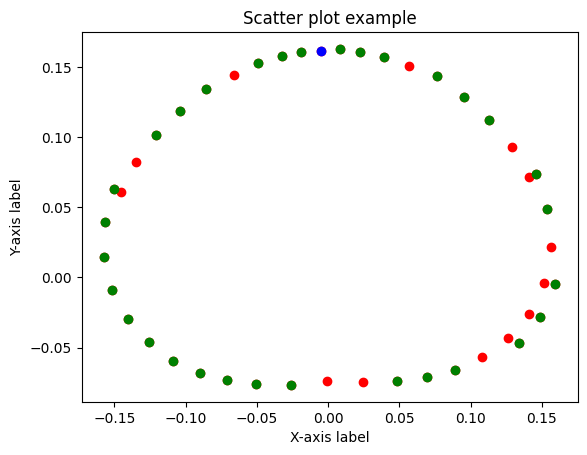

In [31]:
fig, ax = plt.subplots()

ax.scatter(vertex_near_sagittal_plane[:,0], vertex_near_sagittal_plane[:,2], color='red', marker='o')
ax.scatter(vertex[3500,0], vertex[3500,2], color='blue', marker='o')
ax.scatter(vertex_near_sagittal_plane[hull.vertices,0], vertex_near_sagittal_plane[hull.vertices,2], color='green', marker='o')

# for i, txt in enumerate(belt_idx):
#     ax.annotate(txt, (vertex_near_sagittal_plane[i,0], vertex_near_sagittal_plane[i,2]))

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot example')

In [32]:
belt = []

for triangle_point_idx in face:
    if on_y(vertex,triangle_point_idx,navel):
        belt.append(triangle_point_idx)

belt

[[678, 665, 679],
 [846, 830, 677],
 [916, 917, 861],
 [861, 917, 858],
 [918, 919, 855],
 [855, 919, 920],
 [939, 846, 938],
 [938, 846, 677],
 [1336, 1337, 917],
 [917, 1337, 858],
 [1448, 1449, 678],
 [678, 1449, 705],
 [1780, 1781, 1779],
 [1779, 1781, 1782],
 [2915, 2916, 830],
 [830, 2916, 831],
 [2917, 2918, 844],
 [844, 2918, 845],
 [846, 2915, 830],
 [2918, 2911, 845],
 [845, 2911, 886],
 [2916, 2917, 831],
 [831, 2917, 844],
 [2929, 2928, 3122],
 [3122, 2928, 2910],
 [1779, 2929, 1780],
 [1780, 2929, 3122],
 [855, 679, 918],
 [918, 679, 665],
 [678, 679, 1448],
 [938, 705, 939],
 [939, 705, 1449],
 [2911, 2910, 886],
 [886, 2910, 2928],
 [861, 920, 916],
 [916, 920, 919],
 [1336, 1767, 3500],
 [3500, 1767, 3501],
 [1336, 3500, 1337],
 [1337, 3500, 1768],
 [1781, 1784, 1782],
 [1782, 1784, 3021],
 [4167, 4151, 4166],
 [4166, 4151, 4150],
 [4150, 4193, 4166],
 [4165, 4317, 4332],
 [4344, 4402, 4345],
 [4345, 4402, 4403],
 [4404, 4405, 4341],
 [4341, 4405, 4406],
 [4165, 4332, 4

In [33]:
loop_length(vertex_near_sagittal_plane[:,[0,2]],hull.vertices)

0.8859267197549343